#   **Pattern recognition course | ECE AUTH | 1st project | Winter semester 2022**

>   Giachoudis Christos | 9912 | giachoud@ece.auth.gr


>   Kostopoulos Andreas Marios | 9658 | andreasmk@ece.auth.gr







# **General comments**


Vector X(x_a, x_b) contains the microbiological indicators. Microbiological indicators are non-negative values. That being said, we are ought to note that negative values are being used too, so that we can provide better vizualizations.




# Necessary imports

In [ ]:
# Importing the necessary libraries and modules
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import statistics
from matplotlib import cm

# Data that are given by the task

In [ ]:
# Task data
m1 = np.array([0.4, 0.8]); # mean values for class ω_1
m2 = np.array([1.5, 2.7]); # mean values for class ω_2
cov_mat1 = np.array([[1.5, 0], [0, 0.8]]); # covariance matrix for the 2 data indicators (Part 1 & 2)
cov_mat2 = cov_mat1/4; # covariance matrix for the 2 data indicators (Part 2)
p_1 = 0.95; # a priori probability for class ω_1
p_2 = 0.05; # a priori probability for class ω_2

# Useful custom made functions

In [ ]:
# Function that configures the typical numpy.linespace function so that we can define the step,
# instead of the numbers of samples (num)
# start: the first value of the linespace
# stop: the last value of the linespace
# step: the length between 2 continuous values in the linespace
def linspace(start, stop, step=1.):
  """
    Like np.linspace but uses step instead of num
    This is inclusive to stop, so if start=1, stop=3, step=0.5
    Output is: array([1., 1.5, 2., 2.5, 3.])
  """
  return np.linspace(start, stop, int((stop - start) / step + 1))

# **Part A**

# **Task A.1**

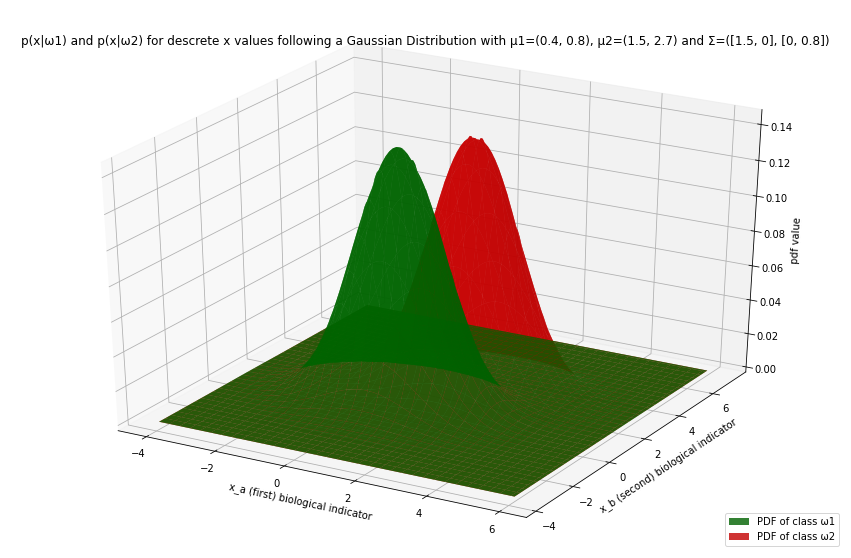

In [ ]:
# Task A.1

# Initializing the random seed to use at the distributions creation here below
random_seed = 1000

#Gaussian distribution for ω1 class "healthy people"
distr1 = multivariate_normal(cov = cov_mat1, mean = m1, seed = random_seed)
#Gaussian distribution for ω2 class "possible existence of cancer"
distr2 = multivariate_normal(cov = cov_mat1, mean = m2, seed = random_seed)

#Setting as sigma_i the main diagonal values of the common covariance matrix
sigma1, sigma2 = cov_mat1[0, 0], cov_mat1[1, 1]

# We make the values of the x vector, where x = (x1, x2). And then we create a meshgrid for these values.
# We take x1 in a range where: 
#   minimum value = min_value(of the μ1 and μ2 first value) - 3*sigma1
#   maximum value = max_value(of the μ1 and μ2 first value) + 3*sigma1
# AS for the x2 on the other hand we take value in a range where:
#   minimum value = min_value(of the μ1 and μ2 second value) - 3*sigma2
#   maximum value = max_value(of the μ1 and μ2 second value) + 3*sigma2
# We followed this procedure based on the method as described on reference[1]
dataset_step = 0.1
x1 = linspace(m1[0] - 3*sigma1, m2[0] + 3*sigma1, step=dataset_step)
x2 = linspace(m1[1] - 3*sigma1, m2[1] + 3*sigma1, step=dataset_step)
X1, X2 = np.meshgrid(x1, x2)

# We form the pdf for the Gaussian distribution of X for the first class ω1
pdf1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        pdf1[i, j] = distr1.pdf([X1[i, j], X2[i, j]]) # we compute the density at each point of the grid

# We form the pdf for the Gaussian distribution of X for the second class ω2
pdf2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
  for j in range(X1.shape[1]):
    pdf2[i, j] = distr2.pdf([X1[i, j], X2[i, j]]) # we compute the density at each point of the grid


# Plotting in the same 3-D figure the two Probability Density Functions
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection = '3d')
plt.title("p(x|ω1) and p(x|ω2) for descrete x values following a Gaussian Distribution with μ1=(0.4, 0.8), μ2=(1.5, 2.7) and Σ=([1.5, 0], [0, 0.8])")
plt.xlabel("x_a (first) biological indicator")
plt.ylabel("x_b (second) biological indicator")
ax.set_zlabel("pdf value")
c1 = ax.plot_surface(X1, X2, pdf1, color="green", label="PDF of class ω1", alpha=.8)
c1._facecolors2d=c1._facecolors3d
c1._edgecolors2d=c1._edgecolors3d
c2 = ax.plot_surface(X1, X2, pdf2, color="red", label="PDF of class ω2", alpha=.8)
c2._facecolors2d = c2._facecolors3d
c2._edgecolors2d = c2._edgecolors3d
plt.legend(loc="lower right")
plt.show()


# Result

We can observe that the density near the mean values is higher than the one at combinations away from them. At those distant combinations it seems that it is highly rare to find a person with the related situation (has cancer or not).


Higher green points mean healthy (ω1 class), higher red points mean possible cancer existence (ω2 class).







# **Task A.2**

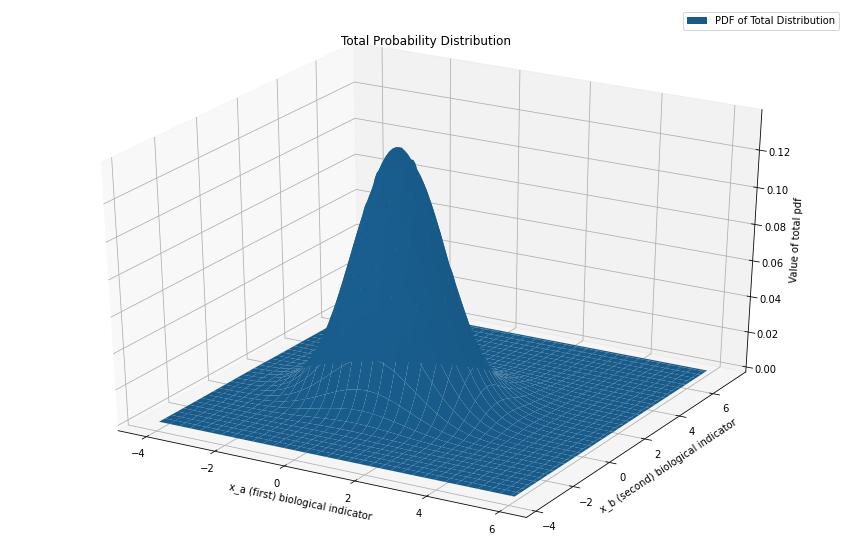

In [ ]:
# Task A.2

# Calculation of Total Probability: 
# p(x) = p(x|ω1)*P(ω1) + p(x|ω2)*P(ω2), 
# where p(x|ω_i) is the pdf of class ω_i and P(ω_i) is the a-priori probability of that class.

# According to the formula above we compute the total probability of X
p = pdf1 * p_1 + pdf2 * p_2

# Plotting the total PDF in a 3-D figure
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection = '3d')
plt.title("Total Probability Distribution")
plt.xlabel("x_a (first) biological indicator")
plt.ylabel("x_b (second) biological indicator")
ax.set_zlabel("Value of total pdf")
c1 = ax.plot_surface(X1, X2, p, label="PDF of Total Distribution")
c1._facecolors2d=c1._facecolors3d
c1._edgecolors2d=c1._edgecolors3d
plt.legend(loc="upper right")
plt.show()

# Result


Calculation of Total Probability: 
 p(x) = p(x|ω1)*P(ω1) + p(x|ω2)*P(ω2), 
 where p(x|ω_i) is the pdf of class ω_i and P(ω_i) is the a-priori probability  of that class.



The 3D plot shows the probability density of all samples regardless of the existence of cancer. The two indicator values are more likely to be observed around the area where the pdf seems to have higher values.




# **Task A.3**

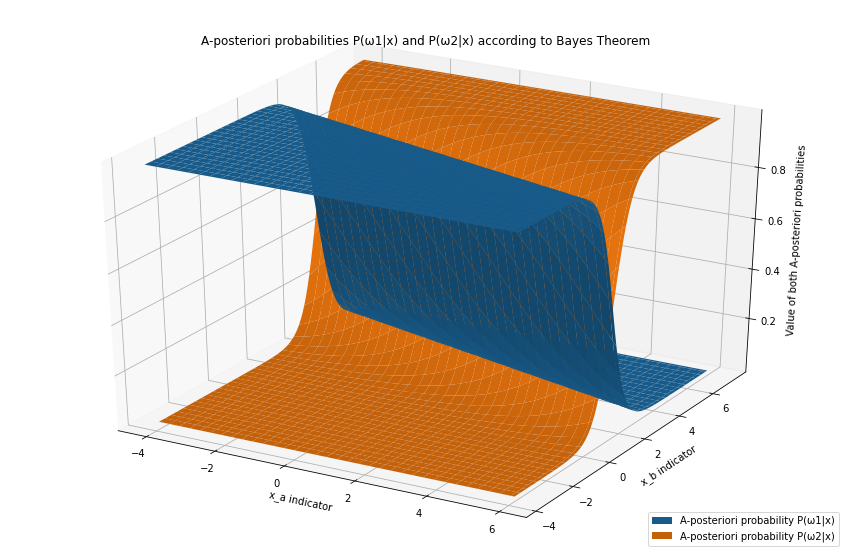

In [ ]:
# Task A.3

# A posteriori probabilities according to Bayes Theorem:
# P(ω1|x) = (p(x|ω1)/P(x)) * P(ω1)
# P(ω2|x) = (p(x|ω2)/P(x)) * P(ω2)
# According to the formula above we compute the aposteriori probabilities
p_aposteriori_1 = (np.divide(pdf1, p)) * p_1
p_aposteriori_2 = (np.divide(pdf2, p)) * p_2

# Plotting the two a-posteriori probabilites as calculated from the Bayes Theorem
fig = plt.figure(figsize=(15, 10)) 
ax = plt.axes(projection = '3d')
plt.title("A-posteriori probabilities P(ω1|x) and P(ω2|x) according to Bayes Theorem")
plt.xlabel("x_a indicator")
plt.ylabel("x_b indicator")
ax.set_zlabel("Value of both A-posteriori probabilities")
c1 = ax.plot_surface(X1, X2, p_aposteriori_1, label="A-posteriori probability P(ω1|x)")
c1._facecolors2d=c1._facecolors3d
c1._edgecolors2d=c1._edgecolors3d
c2 = ax.plot_surface(X1, X2, p_aposteriori_2, label="A-posteriori probability P(ω2|x)")
c2._facecolors2d = c2._facecolors3d
c2._edgecolors2d = c2._edgecolors3d
plt.legend(loc="lower right")
plt.show()

# Result


 A posteriori probabilities according to Bayes Theorem:


 P(ω1|x) = (p(x|ω1)/P(x)) * P(ω1)


 P(ω2|x) = (p(x|ω2)/P(x)) * P(ω2)



The 3D plots above help us get a clearer view of the probabilities of having cancer or being healthy, based on the microbiological indicators we are getting from the medical tests.



Note: We observe that the microbiological indicator that has the most important role is the **x_b** indicator.


In this case, we can see that the decision regions are separeted with a single line.



# **Task A.4**


In [ ]:
# Task A.4

# Bayesian error calculation: P_error = integral_(P(ω_1|X)p(X))dX + integral_(P(ω_1|X)p(X))dX at Xs that do not belong at the corresponding class

errors = np.zeros(pdf1.shape) # table that will contain the errors for each point of the data set

# We have a limited(non-infinite) amount of values for the integral computation. So we will compute an approach of the error using sums

# We compute each term separately and store them
for i in range(len(X1)):
    for j in range(len(X1[0])):
      if pdf1[i][j] >= pdf2[i][j]:
          # true is class 1 and the error is to choose class 2
          errors[i][j] = p_aposteriori_2[i][j] * p[i][j] # calculation of error for each specific point
      else:
          # true is class 2 and the error is to choose class 1
          errors[i][j] = p_aposteriori_1[i][j] * p[i][j] # calculation of error for each specific point

# We add up all the computed terms
some_sum = list(map(sum, errors))
errors_sum = sum(some_sum)

# And then we multiply with the step^2 (instead of (dx)^2)
bayes_error = errors_sum * (dataset_step**2)

print("The bayesian error is: " + str(bayes_error))


The bayesian error is: 0.12318792732903582


# Result

Bayesian error calculation: P_error = integral_(P(ω_1|X)p(X))dX + integral_(P(ω_1|X)p(X))dX 

at Xs that do not belong at the corresponding class. 


For example: there is a probability of 0.12% for a person to be missclassified e.g. possible existence of cancer while they are healthy

Our estimations are good. The error is really small. But we cannot avoid it. Errors will occur over time.


# **Part B**

In this case we repeat all the previous steps, but first we change the Covariance Matrix for the class ω2 (possible cancer existence).

So we have for the ω1 class: Σ1 = [ [1.5  , 0.0],
                                    [0.0  , 0.8] ]
                                    
And for the ω2 class:        Σ2 = [ [0.375  , 0.0],
                                    [0.0    , 0.2] ]

We have already formed the two covariance matrices from the beginning.

# **Task B.1.1**

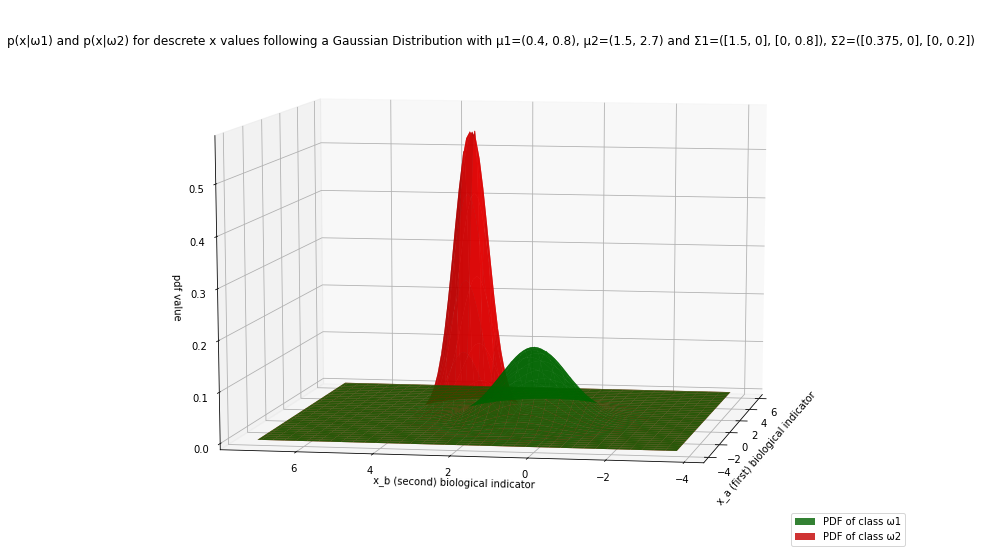

In [ ]:
# Task B.1.1
# Initializing the random seed to use at the distributions creation here below
random_seed = 1000

#Gaussian distribution for ω1 class "healthy people"
distr1 = multivariate_normal(cov = cov_mat1, mean = m1, seed = random_seed)
#Gaussian distribution for ω2 class "possible existence of cancer"
distr2 = multivariate_normal(cov = cov_mat2, mean = m2, seed = random_seed)

#Setting as sigma_i the main diagonal values of the covariance matrix of the first class ω1
sigma1, sigma2 = cov_mat1[0, 0], cov_mat1[1, 1]

# We make the values of the x vector, where x = (x1, x2).
# We take x1 in a range where: 
#   minimum value = min_value(of the μ1 and μ2 first value) - 3*sigma1
#   maximum value = max_value(of the μ1 and μ2 first value) + 3*sigma1
# AS for the x2 on the other hand we take value in a range where:
#   minimum value = min_value(of the μ1 and μ2 second value) - 3*sigma2
#   maximum value = max_value(of the μ1 and μ2 second value) + 3*sigma2
# We followed this procedure based on the method as described on rederence[1]
dataset_step = 0.1
x1 = linspace(m1[0] - 3*sigma1, m2[0] + 3*sigma1, step=dataset_step)
x2 = linspace(m1[1] - 3*sigma1, m2[1] + 3*sigma1, step=dataset_step)
X1, X2 = np.meshgrid(x1, x2)

# We form the pdf for the Gaussian distribution of X for the first class ω1
pdf1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        pdf1[i, j] = distr1.pdf([X1[i, j], X2[i, j]])

# We form the pdf for the Gaussian distribution of X for the first class ω2
pdf2 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
  for j in range(X1.shape[1]):
    pdf2[i, j] = distr2.pdf([X1[i, j], X2[i, j]])


# Plotting in the same 3-D figure the two Probability Density Functions
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection = '3d')
plt.title("p(x|ω1) and p(x|ω2) for descrete x values following a Gaussian Distribution with μ1=(0.4, 0.8), μ2=(1.5, 2.7) and Σ1=([1.5, 0], [0, 0.8]), Σ2=([0.375, 0], [0, 0.2])")
plt.xlabel("x_a (first) biological indicator")
plt.ylabel("x_b (second) biological indicator")
ax.set_zlabel("pdf value")
c1 = ax.plot_surface(X1, X2, pdf1, color="green", label="PDF of class ω1", alpha=.8)
c1._facecolors2d=c1._facecolors3d
c1._edgecolors2d=c1._edgecolors3d
c2 = ax.plot_surface(X1, X2, pdf2, color="red", label="PDF of class ω2", alpha=.8)
c2._facecolors2d = c2._facecolors3d
c2._edgecolors2d = c2._edgecolors3d
plt.legend(loc="lower right")
ax.view_init(10,190)
plt.show()


# Result


As we expected, because of the fact that the main diagonal of the Σ2 has smaller values than the one of the Σ1 covariance matrix, we observe that the samples for the class ω2 are more concentrated around the mean values μ2. 


This explains the fact that the pdf for the class ω2 (the red one) has reached higher values than the pdf for the ω1 class.






# **Task B.1.2**

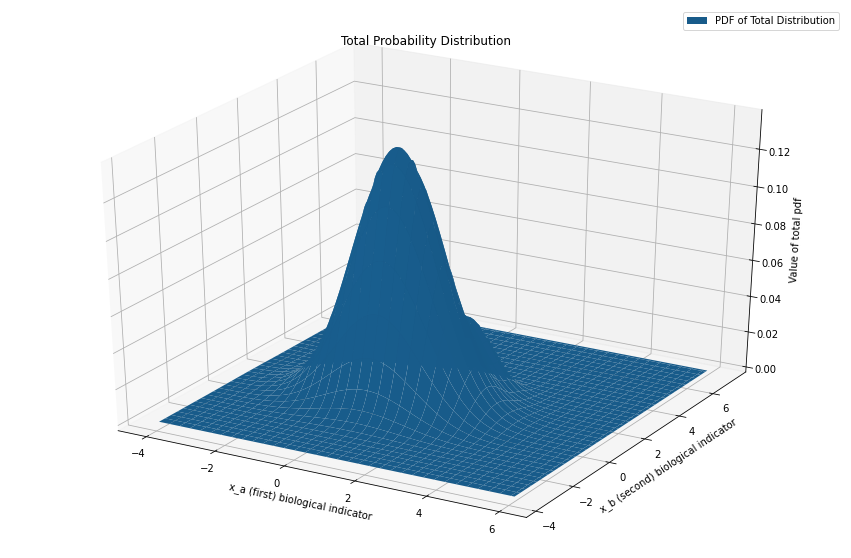

In [ ]:
# Task B.1.2
# Total Probability: P(x) = p(x|ω1)*P(ω1) + p(x|ω2)*P(ω2)
# According to the formula above we compute the total probability of X
p = np.array(pdf1 * p_1 + pdf2 * p_2)

#Plotting the total PDF in a 3-D figure
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection = '3d')
plt.title("Total Probability Distribution")
plt.xlabel("x_a (first) biological indicator")
plt.ylabel("x_b (second) biological indicator")
ax.set_zlabel("Value of total pdf")
c1 = ax.plot_surface(X1, X2, p, label="PDF of Total Distribution")
c1._facecolors2d=c1._facecolors3d
c1._edgecolors2d=c1._edgecolors3d
plt.legend(loc="upper right")

plt.show()


# Result

Total Probability: P(x) = p(x|ω1)*P(ω1) + p(x|ω2)*P(ω2)


According to the formula above we compute the total probability of X

Again, the 3D plot shows the probability density of all samples regardless of the existence of cancer. The two indicator values are more likely to be observed around the area where the pdf seems to have higher values.

# **Task B.1.3**

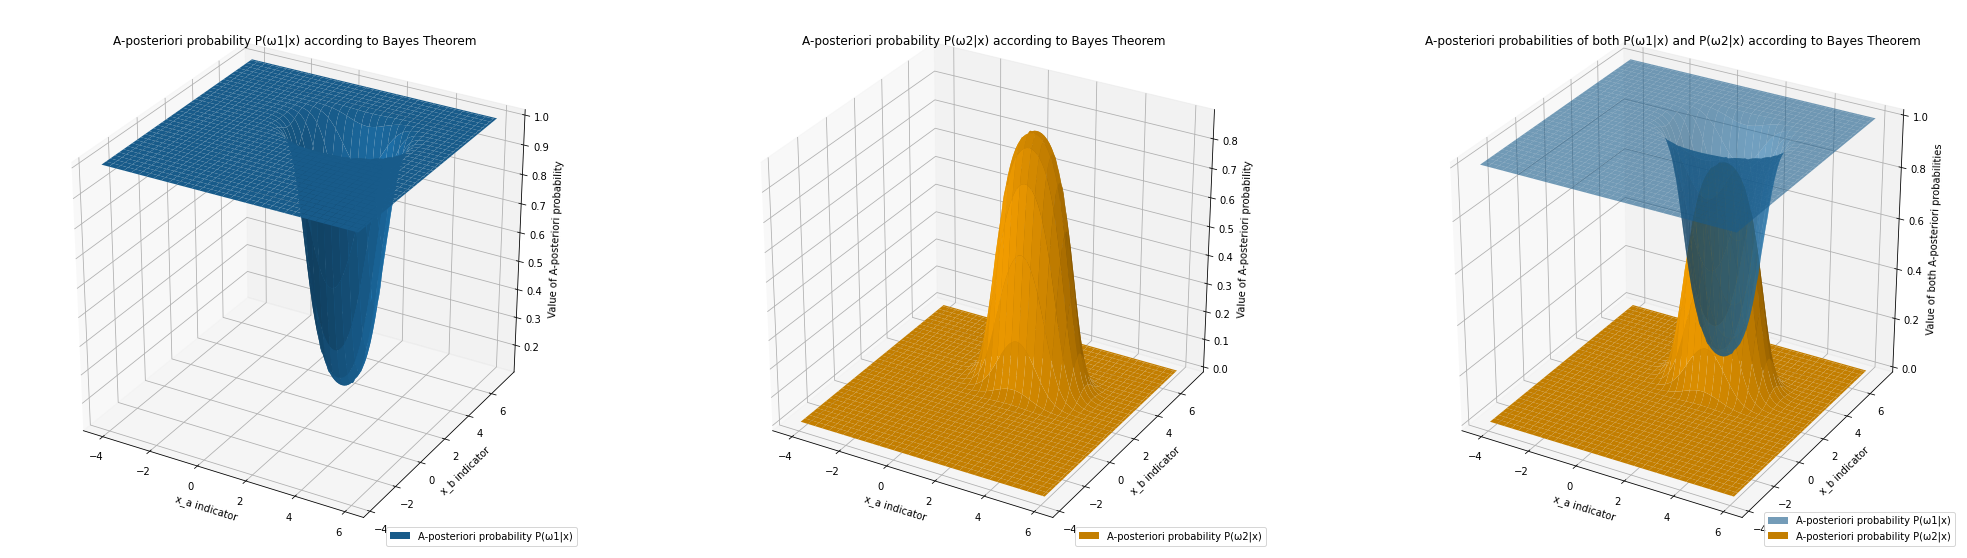

In [ ]:
# Task B.1.3

#A posteriori probabilities according to Bayes Theorem:
# p(ω1|x) = (p(x|ω1)/P(x)) * P(ω1)
# p(ω2|x) = (p(x|ω2)/P(x)) * P(ω2)
# According to the formula above we compute the aposteriori probabilities
p_aposteriori_1 = (np.divide(pdf1, p)) * p_1
p_aposteriori_2 = (np.divide(pdf2, p)) * p_2

#Plotting the two a-posteriori probabilites as calculated from the Bayes Theorem
fig = plt.figure(figsize=(35, 10)) # prepare a figure
ax = fig.add_subplot(1, 3, 1, projection='3d')
plt.title("A-posteriori probability P(ω1|x) according to Bayes Theorem")
plt.xlabel("x_a (first) indicator")
plt.ylabel("x_b (second) indicator")
ax.set_zlabel("Value of A-posteriori probability")
c1 = ax.plot_surface(X1, X2, p_aposteriori_1, label="A-posteriori probability P(ω1|x)")
c1._facecolors2d=c1._facecolors3d
c1._edgecolors2d=c1._edgecolors3d
plt.legend(loc="lower right")

#Adding a subplot for better visualization
ax = fig.add_subplot(1, 3, 2, projection='3d')
plt.title("A-posteriori probability P(ω2|x) according to Bayes Theorem")
plt.xlabel("x_a (first) indicator")
plt.ylabel("x_b (second) indicator")
ax.set_zlabel("Value of A-posteriori probability")
c2 = ax.plot_surface(X1, X2, p_aposteriori_2, label="A-posteriori probability P(ω2|x)", color='orange')
c2._facecolors2d = c2._facecolors3d
c2._edgecolors2d = c2._edgecolors3d
plt.legend(loc="lower right")

#Plotting them together
ax = fig.add_subplot(1, 3, 3, projection='3d')
plt.title("A-posteriori probabilities of both P(ω1|x) and P(ω2|x) according to Bayes Theorem")
plt.xlabel("x_a (first) indicator")
plt.ylabel("x_b (second) indicator")
ax.set_zlabel("Value of both A-posteriori probabilities")
c1 = ax.plot_surface(X1, X2, p_aposteriori_1, label="A-posteriori probability P(ω1|x)", alpha=0.6)
c1._facecolors2d=c1._facecolors3d
c1._edgecolors2d=c1._edgecolors3d
c2 = ax.plot_surface(X1, X2, p_aposteriori_2, label="A-posteriori probability P(ω2|x)", color='orange')
c2._facecolors2d = c2._facecolors3d
c2._edgecolors2d = c2._edgecolors3d
plt.legend(loc="lower right")

plt.show()


# Result
A posteriori probabilities according to Bayes Theorem:


 p(ω1|x) = (p(x|ω1)/P(x)) * P(ω1)


 p(ω2|x) = (p(x|ω2)/P(x)) * P(ω2)


 The blue plot represents the probability of being healthy and the orange one represents the probability of cancer existence given the two microbiological indicators.


The 3D plots above help us get a clearer view of the probabilities of having cancer or being healthy, based on the microbiological indicators we are getting from the medical tests.


In this case, we can see that the decision regions are separeted with a circle, e.g. where the two plots intersect.

# **Task B.1.4**

In [ ]:
# Task B.1.4

# Bayesian error calculation: P_error = integral_(P(ω_1|X)p(X))dX + integral_(P(ω_1|X)p(X))dX at Xs that do not belong at the corresponding class

errors = np.zeros(pdf1.shape) # table that will contain the errors for each point of the data set

# We have a limited(non-infinite) amount of values for the integral computation. So we will compute an approach of the error using sums

# We compute each term separately and store them
for i in range(len(X1)):
    for j in range(len(X1[0])):
      if pdf1[i][j] >= pdf2[i][j]:
          # true is class 1 and the error is to choose class 2
          errors[i][j] = p_aposteriori_2[i][j] * p[i][j] # calculation of error for each specific point
      else:
          # true is class 2 and the error is to choose class 1
          errors[i][j] = p_aposteriori_1[i][j] * p[i][j] # calculation of error for each specific point

# We add up all the computed terms
some_sum = list(map(sum, errors))
errors_sum = sum(some_sum)

# And then we multiply with the step^2 (instead of (dx)^2)
bayes_error = errors_sum * (dataset_step**2)

print("The bayesian error is:" + str(bayes_error))


The bayesian error is:0.06652570541618126


# Result


Bayesian error calculation: P_error = integral_(P(ω_1|X)p(X))dX + integral_(P(ω_1|X)p(X))dX 

at Xs that do not belong at the corresponding class.


For example: there is a probability of 0.066% for a person to be missclassified e.g. possible existence of cancer while they are healthy





# **Task B.2**



The error is significantly smaller than the previous one. This can be explained by the fact that the Σ2 covariance matrix has smaller values in the main diagonal. That means, as we explained before, that the samples for the class ω2 are more concentrated around the mean values μ2. This results in a smaller region of overlapping between the two probability density functions of the two given classes.


So the classifier for the second case is much more precise.



# **References**


> [[1]: Visualizing the Bivariate Gaussian Distribution in Python](https://www.geeksforgeeks.org/visualizing-the-bivariate-gaussian-distribution-in-python/)

